![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exploratory Data Analysis
***
This section covers loading the datasets and looking through each to gain a high level understanding of each. 

In [2]:
# Here you run your code to explore the data
basics_df = pd.read_csv ("zippedData/title.basics.csv")
ratings_df = pd.read_csv("zippedData/title.ratings.csv")
movie_gross_df =  pd.read_csv("zippedData/bom.movie_gross.csv")



### Previewing each DataFrame
This will help us understand columns of each table, the number of rows in each and what each row represents


In [15]:
# find out number of columns and rows
basics_df.shape 

(146144, 6)

In [14]:
#display the top 5 observations of the dataset 
basics_df.head() 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In the basics table, each row represents a  Title/Film with the following characteristics:
* Unique identifier
* Original and Primary(Popular) Titles
* Start year and the runtime  
* Genre/Category

In [19]:
#display the last 5 observations of the basics_df 
basics_df.tail() 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [17]:
#checking the shape of ratings_df
ratings_df.shape

(73856, 3)

In [18]:
# preview the first 5 rows
ratings_df.head() 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In the ratings table, each row represents a Title's average rating and the number of votes that led to the said rating.

In [20]:
#preview the last 5 rows of ratings_df
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
#preview the first 5 rows of movie_gross_df
movie_gross_df.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Each row in this table represents a title's name, the studio, Domestic and Foreign earnings as well as the year the film was released

In [23]:
#preview the last 5 rows 
movie_gross_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


*there is a notably high number of NaN values in the foreign_gross column. This will be addressed in the data praparation step*

In [20]:
#merge the two 
combined_df = basics_df.merge(ratings_df)
combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


Some columns won't be useful for the analysis, so they will be dropped.

In [26]:
#First question: What is the most Popular Genre?
#Columns to use: original_title, genres, averagerating, numvotes

popular_genre_df = combined_df[['tconst','original_title', 'genres', 'averagerating', 'numvotes']]
popular_genre_df.head()


,tconst,original_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,"Comedy,Drama,Fantasy",6.5,119


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [4]:
#Get info about columns, their data types and number of values in each
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [31]:
#Check for duplicated rows: 

print("Duplicate rows:", combined_df.duplicated().sum())


Duplicate rows: 0


In [13]:
#check for null values in the columns and their percentages 
null_values = combined_df.isnull().sum()
percentage_null = combined_df.isnull().sum()/(len (combined_df)) * 100
pd.concat([null_values, percentage_null], axis=1, keys=['Values', 'Null Percentage'])

,Values,Null Percentage
tconst,0,0.000000
primary_title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
runtime_minutes,7620,10.317374
genres,804,1.088605
averagerating,0,0.000000
numvotes,0,0.000000


runtime_minutes apppears to have 10% missing values. Let's investigate that

In [86]:
combined_df['runtime_minutes'].fillna(combined_df['runtime_minutes'].mode(), inplace=True)

In [87]:
combined_df['runtime_minutes'].isna()

0        False
1        False
2        False
3         True
4        False
         ...  
73851    False
73852    False
73853     True
73854     True
73855    False
Name: runtime_minutes, Length: 73856, dtype: bool

In [83]:
#check for null values in the columns and their percentages 
null_values = combined_df.isnull().sum()
percentage_null = combined_df.isnull().sum()/(len (combined_df)) * 100
pd.concat([null_values, percentage_null], axis=1, keys=['Values', 'Null Percentage'])

,Values,Null Percentage
tconst,0,0.000000
primary_title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
runtime_minutes,7620,10.317374
genres,804,1.088605
averagerating,0,0.000000
numvotes,0,0.000000


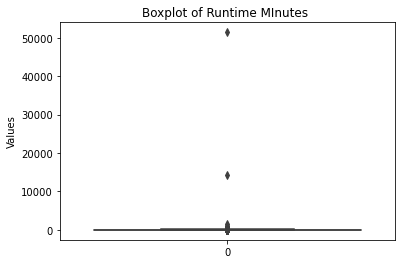

In [49]:
#checking for outliers 
boxplot = sns.boxplot(data = combined_df['runtime_minutes'])
boxplot.set(ylabel = "Values", title = "Boxplot of Runtime MInutes ");

In [55]:
#Removing the outliers using the inter quartile range approach
Q1 = np.percentile(combined_df['runtime_minutes'], 25, interpolation='midpoint')
Q3 = np.percentile(combined_df['runtime_minutes'], 75, interpolation='midpoint')

combined_df['runtime_minutes'][:].dtypes

dtype('float64')

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***